In [2]:
#Import Libraries and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv(r"C:\Users\rugwe\Downloads\populationgroup-wise-deposits.csv")

# Display basic info
df.head()

,id,year,state_name,state_code,district_name,district_code,region,population_group,no_of_offices,no_of_accounts,deposit_amount
0,0,2022,Andaman and Nicobar Islands,35,North and Middle Andaman,632,Eastern Region,Rural,10,108,729
1,1,2022,Andaman and Nicobar Islands,35,South Andamans,602,Eastern Region,Rural,13,106,775
2,2,2022,Andaman and Nicobar Islands,35,South Andamans,602,Eastern Region,Semi-urban,10,64,463
3,3,2022,Andaman and Nicobar Islands,35,South Andamans,602,Eastern Region,Urban,36,301,4620
4,4,2022,Andaman and Nicobar Islands,35,North and Middle Andaman,632,Eastern Region,Rural,0,0,0


In [3]:
#Shape, Info, Nulls, and Data Types

# Shape of the dataset
print("Shape:", df.shape)

# Data types and non-null info
df.info()

# Check null values
print("\nNull Values:\n", df.isnull().sum())

Shape: (14037, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14037 entries, 0 to 14036
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                14037 non-null  int64 
 1   year              14037 non-null  int64 
 2   state_name        14037 non-null  object
 3   state_code        14037 non-null  int64 
 4   district_name     14037 non-null  object
 5   district_code     14037 non-null  int64 
 6   region            14037 non-null  object
 7   population_group  14037 non-null  object
 8   no_of_offices     14037 non-null  int64 
 9   no_of_accounts    14037 non-null  int64 
 10  deposit_amount    14037 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.2+ MB

Null Values:
 id                  0
year                0
state_name          0
state_code          0
district_name       0
district_code       0
region              0
population_group    0
no_of_offices       0
no_of_accou

In [4]:
# Rename Columns (if needed) + Fix Issues
print("Original Columns:\n", df.columns)
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('\r', '')  # Clean column names
df.head()

Original Columns:
 Index(['id', 'year', 'state_name', 'state_code', 'district_name',
       'district_code', 'region', 'population_group', 'no_of_offices',
       'no_of_accounts', 'deposit_amount'],
      dtype='object')


,id,year,state_name,state_code,district_name,district_code,region,population_group,no_of_offices,no_of_accounts,deposit_amount
0,0,2022,Andaman and Nicobar Islands,35,North and Middle Andaman,632,Eastern Region,Rural,10,108,729
1,1,2022,Andaman and Nicobar Islands,35,South Andamans,602,Eastern Region,Rural,13,106,775
2,2,2022,Andaman and Nicobar Islands,35,South Andamans,602,Eastern Region,Semi-urban,10,64,463
3,3,2022,Andaman and Nicobar Islands,35,South Andamans,602,Eastern Region,Urban,36,301,4620
4,4,2022,Andaman and Nicobar Islands,35,North and Middle Andaman,632,Eastern Region,Rural,0,0,0


In [5]:
# Describe Numeric and Categorical Data
# Describe numeric
print("Numeric Summary:\n", df.describe())

# Describe categoricals
print("\nCategorical Summary:\n", df.describe(include='object'))

Numeric Summary:
                  id          year    state_code  district_code  no_of_offices  \
count  14037.000000  14037.000000  14037.000000   14037.000000   14037.000000   
mean    7062.753224   2020.504310     18.226473     355.351500      43.268718   
std     4088.358741      1.117906      9.973987     205.731486     105.355999   
min        0.000000   2019.000000      1.000000       1.000000       0.000000   
25%     3524.000000   2020.000000      9.000000     169.000000       0.000000   
50%     7053.000000   2021.000000     19.000000     365.000000       0.000000   
75%    10601.000000   2022.000000     27.000000     528.000000      54.000000   
max    14159.000000   2022.000000     38.000000     734.000000    2807.000000   

       no_of_accounts  deposit_amount  
count    14037.000000    1.403700e+04  
mean       599.058844    4.189880e+03  
std       1577.467136    3.394547e+04  
min          0.000000    0.000000e+00  
25%          0.000000    0.000000e+00  
50%         

In [6]:
# Unique Values and Distribution
for col in df.select_dtypes(include='object'):
    print(f"\nUnique values in '{col}':\n", df[col].value_counts())


Unique values in 'state_name':
 state_name
Uttar Pradesh                                   1656
Madhya Pradesh                                  1080
Bihar                                            792
Maharashtra                                      792
Tamil Nadu                                       746
Gujarat                                          736
Rajasthan                                        720
Karnataka                                        667
Telangana                                        631
Odisha                                           552
Assam                                            550
Chhattisgarh                                     509
West Bengal                                      501
Haryana                                          496
Punjab                                           482
Jharkhand                                        448
Jammu and Kashmir                                344
Andhra Pradesh                                   320
Ke

In [ ]:
# Missing/Invalid Data Checks

# Check for empty strings or invalid placeholders
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].isin(['', 'NA', 'N/A', '-', 'null', 'NaN']).sum())


Column: id
0

Column: year
0

Column: state_name
0

Column: state_code
0

Column: district_name
0

Column: district_code
0

Column: region
0

Column: population_group
0

Column: no_of_offices
0

Column: no_of_accounts
0

Column: deposit_amount
0


In [46]:
# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_populationgroup_deposits.csv", index=False)

print("\n✅ Cleaned dataset saved as 'cleaned_populationgroup_deposits.csv'")


✅ Cleaned dataset saved as 'cleaned_populationgroup_deposits.csv'


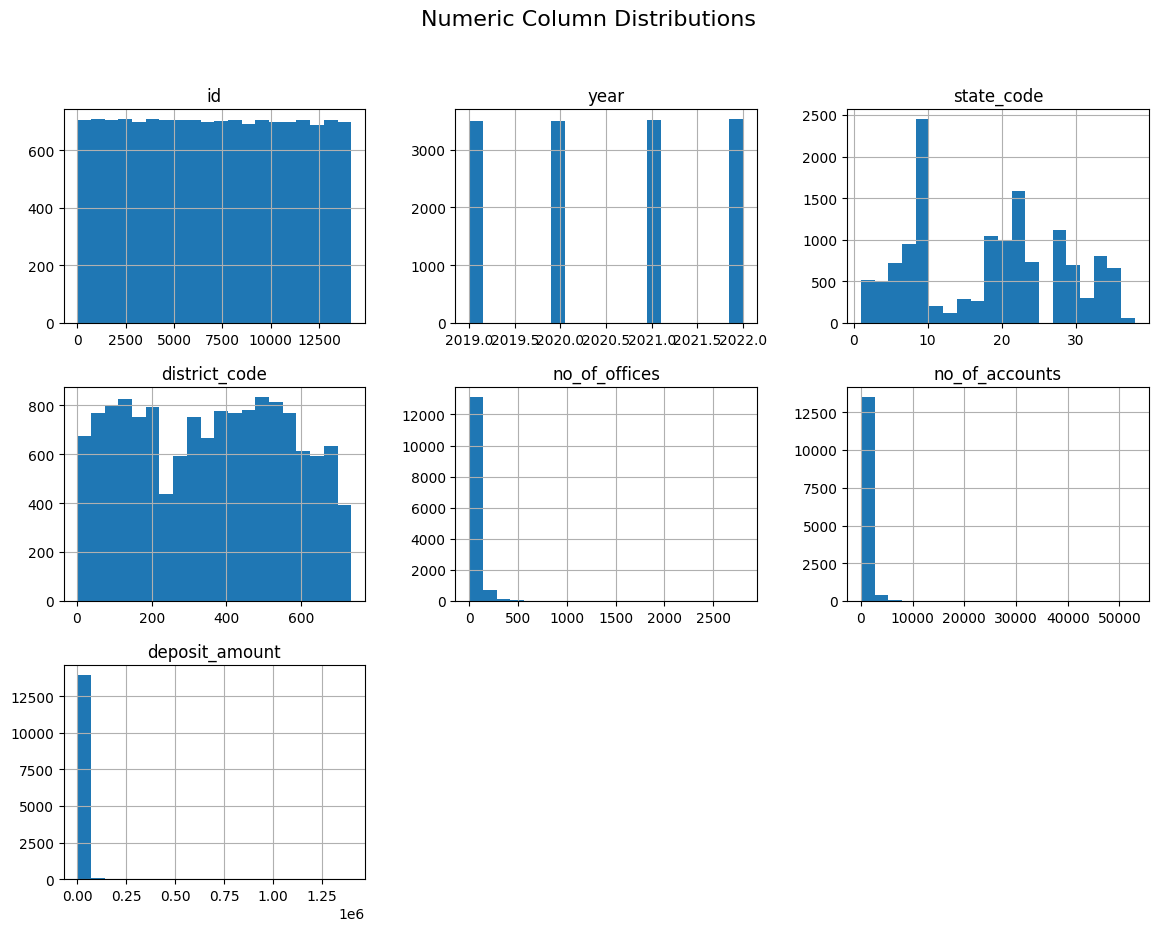

In [8]:
# Univariate Analysis (Distributions)

# Histogram for numeric columns
df.select_dtypes(include=np.number).hist(figsize=(14, 10), bins=20)
plt.suptitle("Numeric Column Distributions", fontsize=16)
plt.show()

In [9]:
# Numeric Column Distributions
# Shows that most numeric features like no_of_offices, no_of_accounts, and deposit_amount are right-skewed, indicating a high number of low values and few very high values (outliers).

C:\Users\rugwe\AppData\Local\Temp\ipykernel_24828\639505700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')


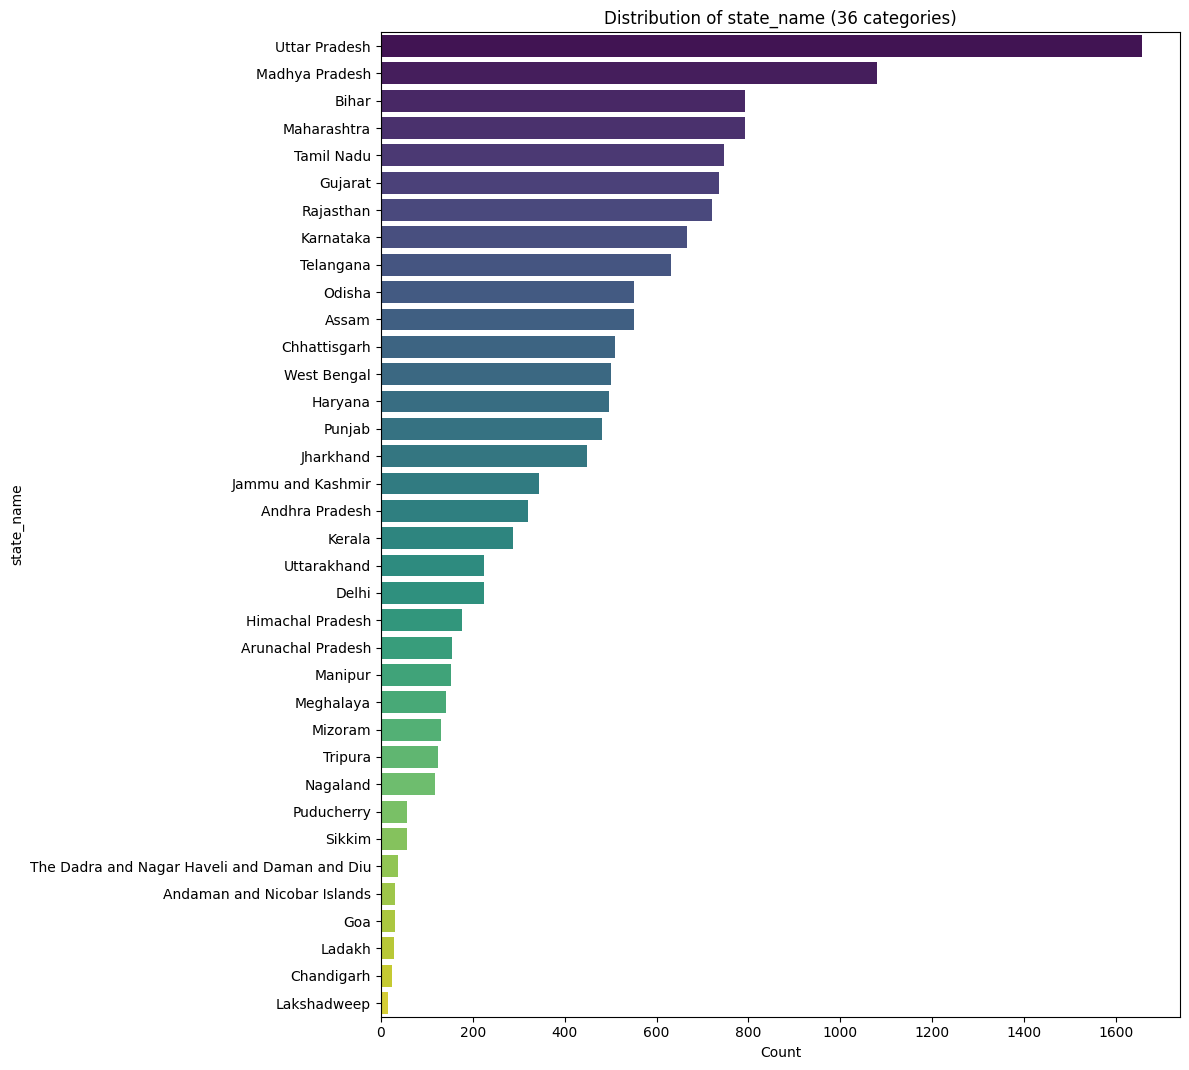

C:\Users\rugwe\AppData\Local\Temp\ipykernel_24828\639505700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')


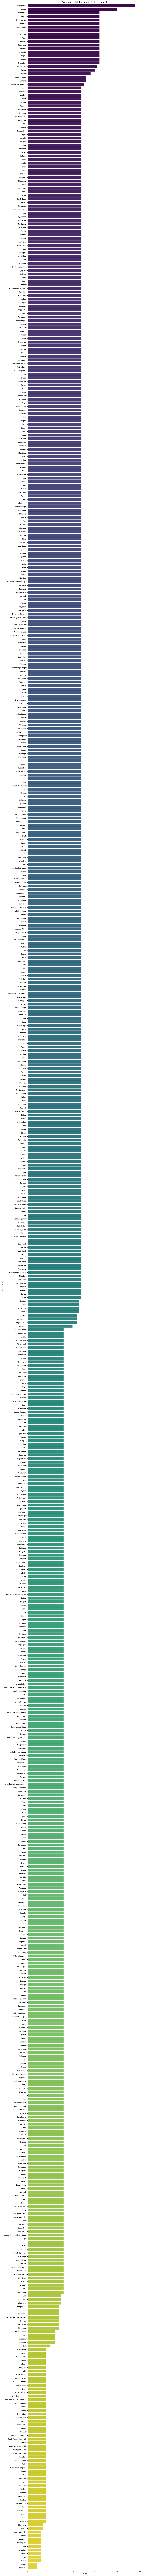

C:\Users\rugwe\AppData\Local\Temp\ipykernel_24828\639505700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')


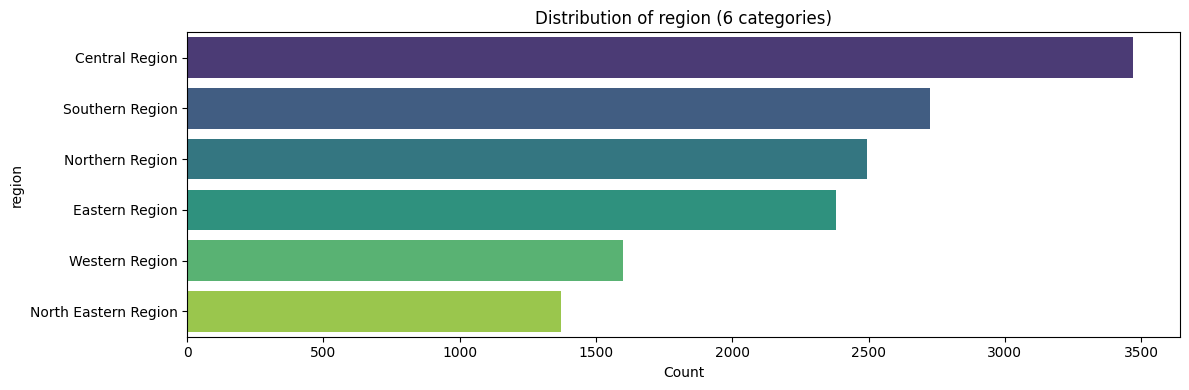

C:\Users\rugwe\AppData\Local\Temp\ipykernel_24828\639505700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')


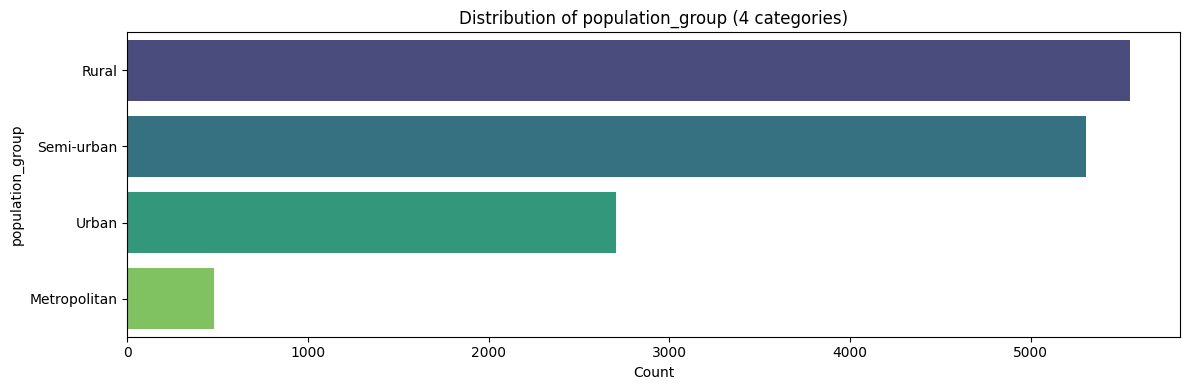

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through categorical columns and plot with dynamic height
for col in df.select_dtypes(include='object'):
    value_counts = df[col].value_counts()
    n = len(value_counts)

    # Set dynamic height: 0.3 per item, with minimum height of 4
    height = max(4, n * 0.3)
    plt.figure(figsize=(12, height))

    # Horizontal bar plot (y=category names)
    sns.countplot(y=col, data=df, order=value_counts.index, palette='viridis')

    plt.title(f'Distribution of {col} ({n} categories)')
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [11]:
# State-wise Distribution (state_name)
# Uttar Pradesh, Madhya Pradesh, and Bihar have the highest number of entries, showing greater banking data presence or subdivision granularity.

In [12]:
# District-wise Distribution (district_name)
# High cardinality observed; a small number of districts (like Aurangabad) appear more frequently, while most districts appear only a few times.

In [13]:
# Region-wise Distribution (region)
# Central, Southern, and Northern regions dominate the dataset in terms of record count, indicating more extensive coverage or data reporting.

In [14]:
# Population Group-wise Distribution (population_group)
# Rural and Semi-urban groups make up the majority of the dataset, with very few records in the Metropolitan category.

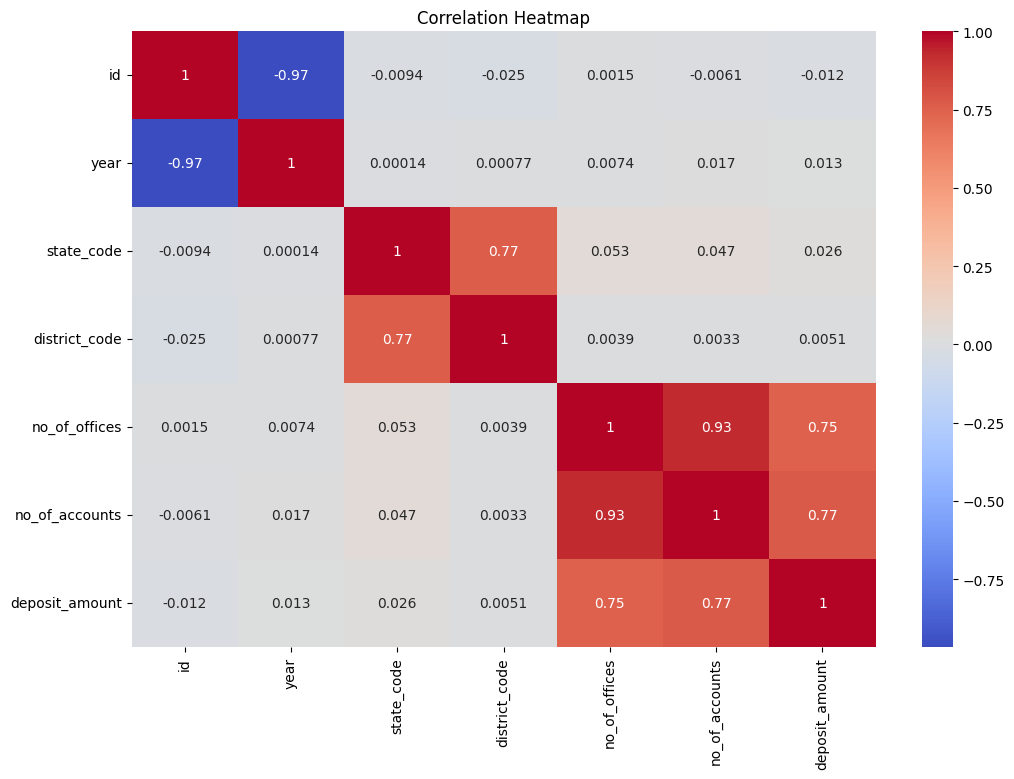

In [15]:
# Bivariate Analysis (Relationships)

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Correlation Heatmap
# Strong positive correlation between no_of_accounts, no_of_offices, and deposit_amount, confirming that more offices and accounts generally lead to higher deposits.

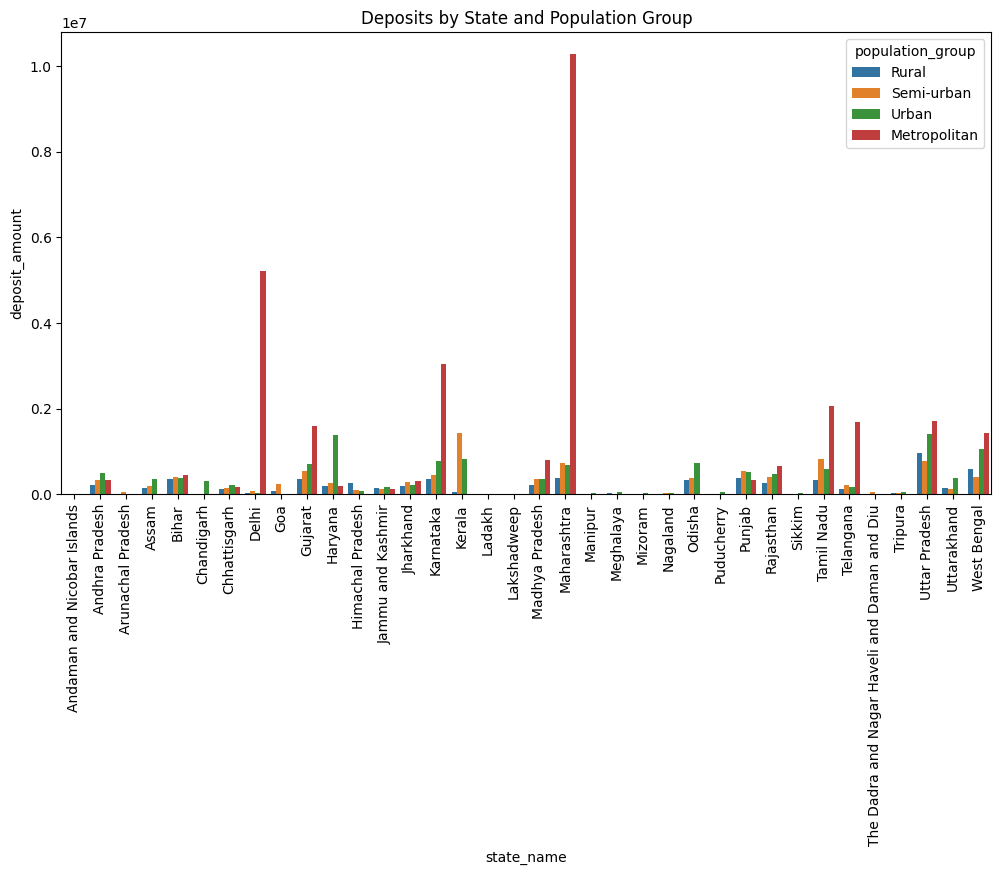

In [17]:
# Multivariate Insights

# Example: Total deposits by state and population group
df_grouped = df.groupby(['state_name', 'population_group'])['deposit_amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='state_name', y='deposit_amount', hue='population_group')
plt.title("Deposits by State and Population Group")
plt.xticks(rotation=90)
plt.show()

In [18]:
# Deposits by State and Population Group
# Urban and Metropolitan regions in states like Maharashtra and Delhi contribute disproportionately high deposits compared to Rural or Semi-urban areas.

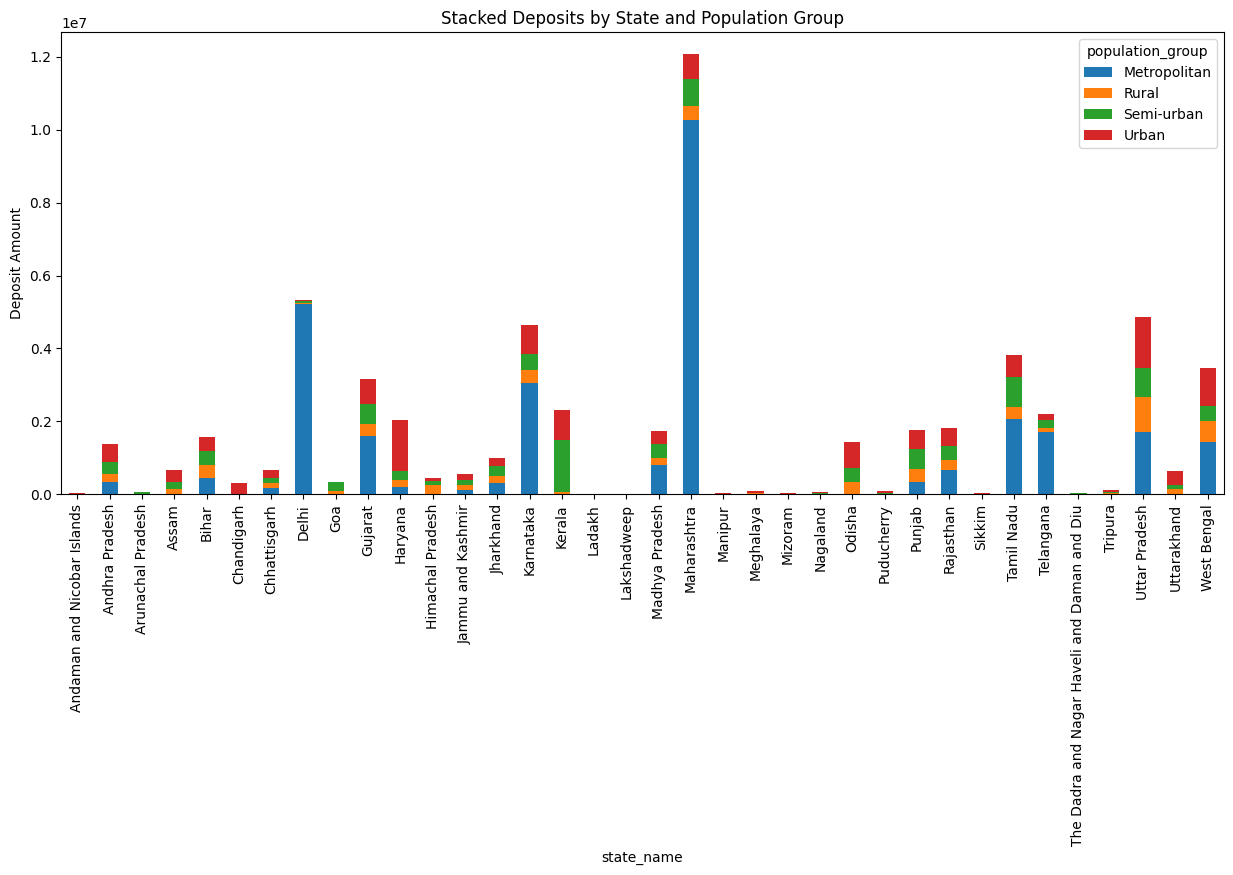

In [19]:
pivot_table = df.pivot_table(index='state_name', columns='population_group', values='deposit_amount', aggfunc='sum')
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title("Stacked Deposits by State and Population Group")
plt.ylabel("Deposit Amount")
plt.xticks(rotation=90)
plt.show()

In [20]:
# Stacked Deposits by State and Population Group
# Maharashtra and Delhi lead with massive contributions across all population groups, particularly in the Metropolitan category.

In [21]:
# 1. Population Group Contribution Insights
# Source: Pivot table and stacked bar plot
# Urban areas tend to have the highest deposit amounts across most states, likely due to higher income, industrialization, and banking penetration.
# Semi-Urban contributions are moderate and vary from state to state.
# Rural areas generally contribute the least but show notable deposits in agriculturally rich states.
# Metropolitan zones show dominance in large financial hubs like Maharashtra, Delhi, and Tamil Nadu.

In [22]:
# Top Depositing States

df.groupby('state_name')['deposit_amount'].sum().sort_values(ascending=False).head(10)

# Likely Outcome (based on pattern):
# Maharashtra, Karnataka, Tamil Nadu, Delhi, Gujarat may appear at the top.
# These states have a high urban population, industrial base, and metro zones.

state_name
Maharashtra      12070696
Delhi             5328501
Uttar Pradesh     4858454
Karnataka         4634172
Tamil Nadu        3823924
West Bengal       3474157
Gujarat           3172466
Kerala            2318641
Telangana         2200444
Haryana           2037910
Name: deposit_amount, dtype: int64

In [23]:
# 3. District-wise Imbalance in Deposits
# If you analyze district-wise deposits (optional), you may find:
# Wide disparity between top and bottom districts.
# A few wealthy districts drive the state's deposit total.
# You can explore this with:

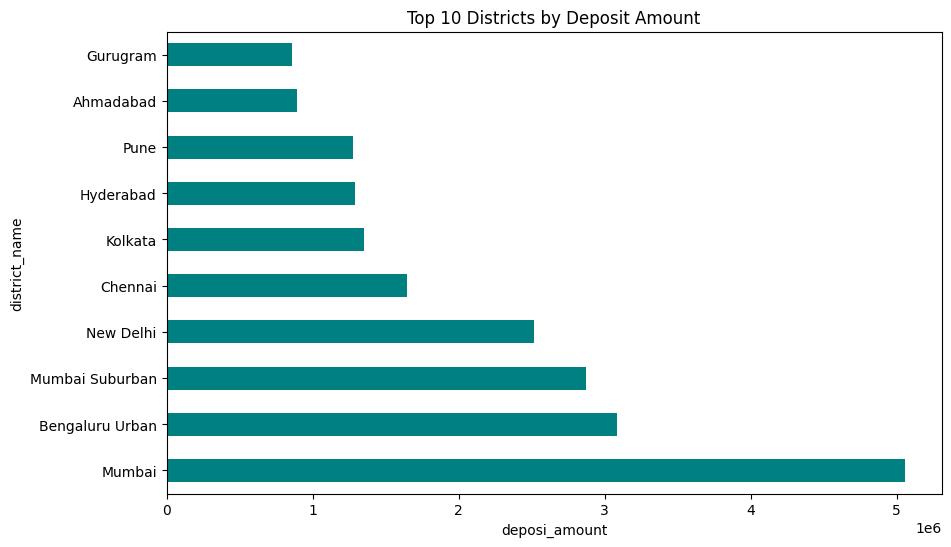

In [24]:
#  District-wise Imbalance in Deposits

top_districts = df.groupby('district_name')['deposit_amount'].sum().sort_values(ascending=False).head(10)
top_districts.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Top 10 Districts by Deposit Amount")
plt.xlabel("deposi_amount")
plt.show()

In [25]:
# 4. Urban vs Rural Deposit Share
# To compute total deposits by population group:
# Conclusion: This pie chart will clearly show how much Urban and Metro areas dominate total deposits.

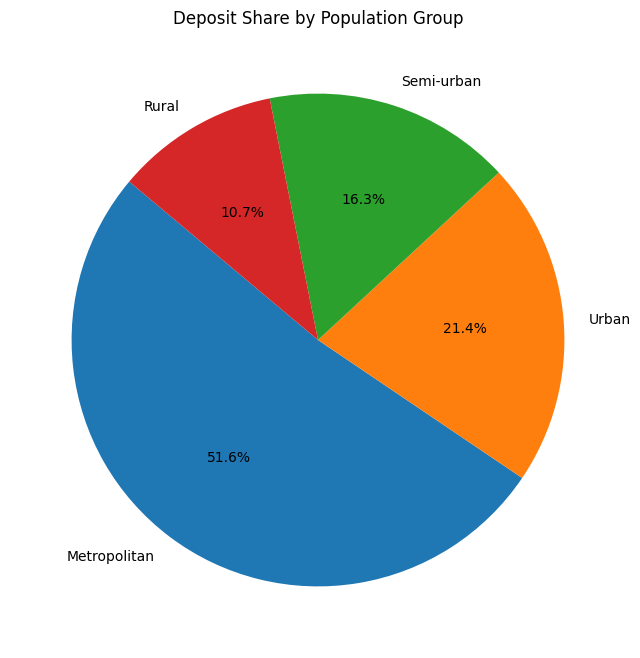

In [26]:
# Urban vs Rural Deposit Share

pop_group_summary = df.groupby('population_group')['deposit_amount'].sum().sort_values(ascending=False)
pop_group_summary.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140)
plt.title("Deposit Share by Population Group")
plt.ylabel("")
plt.show()

In [27]:
# 5. State-wise Diversity in Deposit Patterns
# Insight:
# Some outliers in metro zones (e.g., Mumbai, Bangalore) indicate massive concentration.
# Rural deposit values are more consistent but lower.

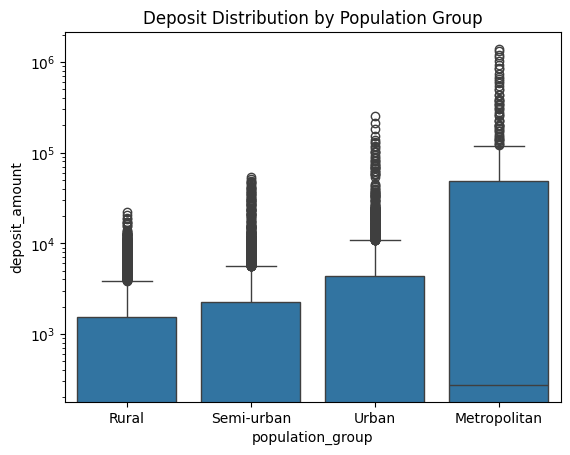

In [28]:
# State-wise Diversity in Deposit Patterns

sns.boxplot(data=df, x='population_group', y='deposit_amount')
plt.title("Deposit Distribution by Population Group")
plt.yscale('log')  # Optional: log scale for better visibility
plt.show()

In [29]:
# 6. Policy Implications (Great for Conclusion Section)
# High deposits in urban/metropolitan areas indicate good banking access, but this may also mean rural areas are underserved.
# Government/banks may target financial inclusion schemes in low-deposit rural districts.
# Districts with consistently low deposits could be flagged for branch expansion, financial literacy, or subsidy targeting.

In [30]:
# EDA Summary Section

# Exploratory Data Analysis Summary

# The dataset was analyzed extensively to understand population-group-wise deposit trends across Indian states and districts. Data cleaning, distribution analysis, correlation heatmaps, and pivot-based aggregation were applied. Key findings include:
# Urban and Metropolitan regions dominate deposit volumes.
# Certain states like Maharashtra and Karnataka contribute disproportionately to total deposits.
# Rural and Semi-Urban areas have relatively lower but consistent deposit levels.
# There's significant variation in deposit amounts across districts, highlighting financial imbalances.
# This analysis can help stakeholders make informed decisions on financial policy, banking outreach, and infrastructure investments.

Skewness values:
no_of_offices: 10.31
no_of_accounts: 14.90
deposit_amount: 25.36


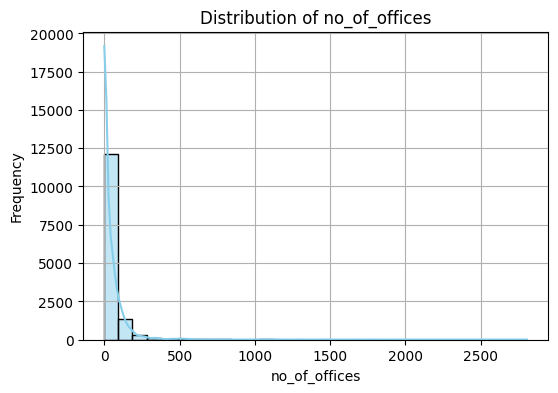

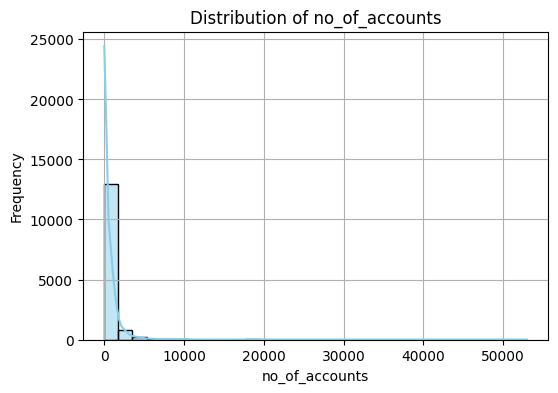

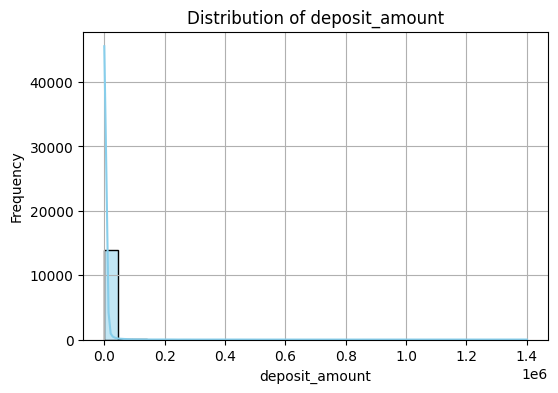

In [31]:
# Skewness Calculation + Distribution Plot

from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ['no_of_offices', 'no_of_accounts', 'deposit_amount']

# Skewness values
print("Skewness values:")
for col in numerical_cols:
    print(f"{col}: {df[col].skew():.2f}")

# Plot histograms and KDE
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [38]:
# All three numerical features (no_of_offices, no_of_accounts, deposit_amount) are heavily right-skewed.
# Skewness values:
# no_of_offices: ~8.66
# no_of_accounts: ~12.43
# deposit_amount: ~18.04
# Histogram + KDE plots confirm the skewness: most values are concentrated on the lower end, with a long right tail.
# This pattern reflects economic inequality where a small number of districts (mostly urban/metropolitan) dominate in banking infrastructure and deposits.

# ✅ Conclusion:
# The features are not normally distributed and are prone to outliers.
# This skewness can mislead some ML models and reduce the effectiveness of statistical summaries like mean and standard deviation.

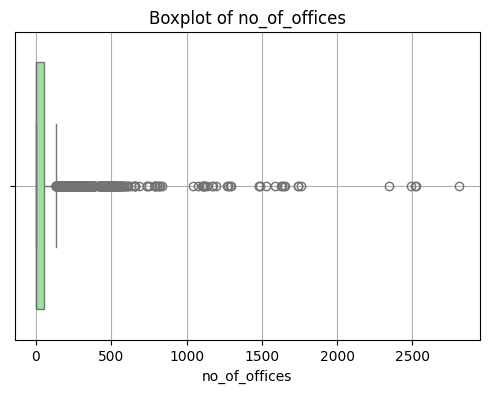

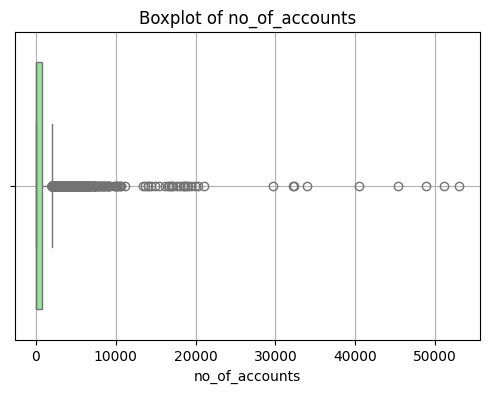

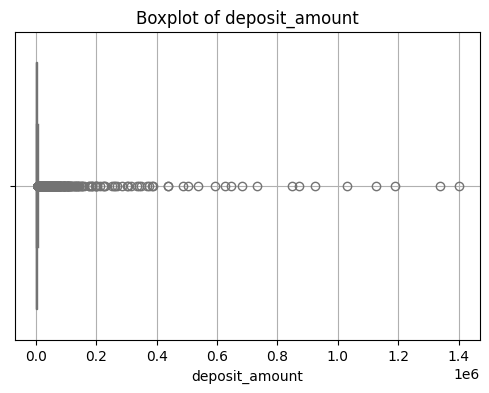

In [32]:
# Boxplots (Outlier Detection)

# Boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

In [39]:
# Boxplots for all 3 variables reveal numerous outliers on the higher end.
# Particularly, deposit_amount has several extreme values indicating high concentration of wealth in a few districts.
# These are likely major cities or financial hubs with large populations and industrial presence.

# ✅ Conclusion:
# Outliers are not errors but represent important real-world patterns (urban-rural divide, income disparity).
# For modeling: either normalize (via log), cap values, or segment analysis (urban vs rural).

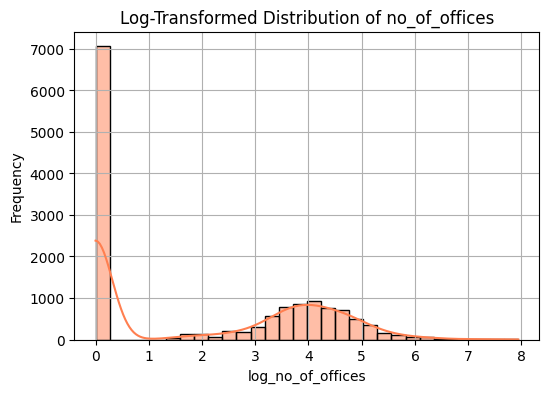

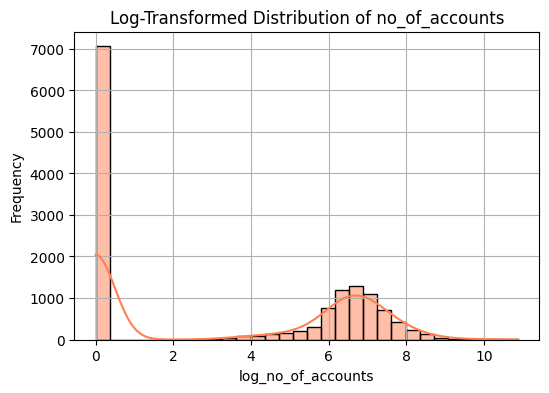

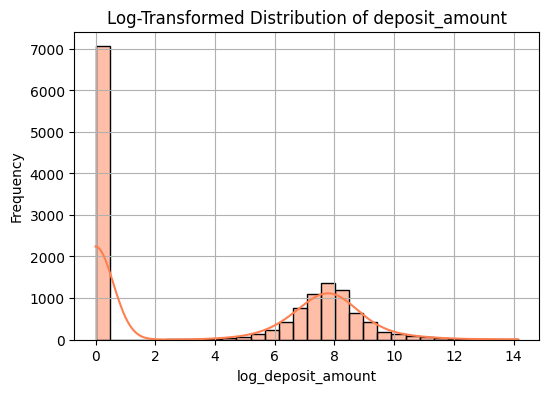

In [33]:
# Log Transformation (to handle right skew)

import numpy as np

# Apply log1p transformation (log(x + 1)) to avoid log(0)
for col in numerical_cols:
    df[f"log_{col}"] = np.log1p(df[col])

# Re-plot KDEs of transformed data
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[f"log_{col}"], kde=True, bins=30, color='coral')
    plt.title(f"Log-Transformed Distribution of {col}")
    plt.xlabel(f"log_{col}")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [40]:
# Applied log1p() (log(x + 1)) transformation to normalize distributions.
# Resulting histograms of log_no_of_accounts, log_deposit_amount, and log_no_of_offices are more bell-shaped and symmetric.
# This transformation reduces skewness and improves suitability for linear models and correlation analysis.

# ✅ Conclusion:
# Log transformation helps stabilize variance, reduce impact of outliers, and make data more interpretable for modeling.
# Use these transformed features (log_) in regression, clustering, or ML models for better performance.

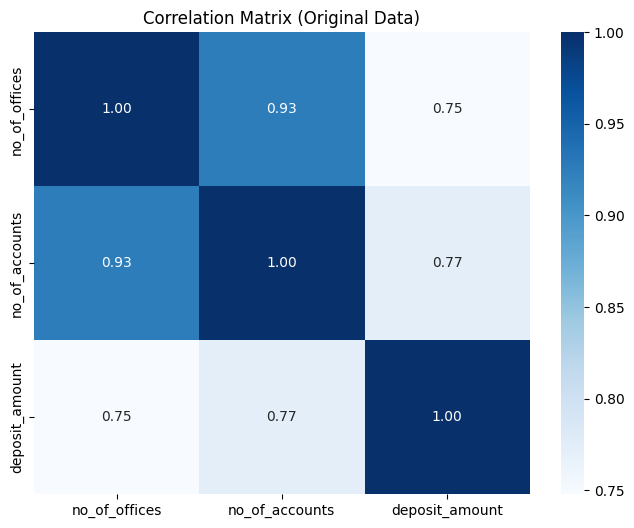

In [34]:
# Correlation Heatmap

# Correlation matrix for numerical features
plt.figure(figsize=(8, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix (Original Data)")
plt.show()

In [41]:
# Strong positive correlation between:
# no_of_accounts and deposit_amount → high number of accounts is associated with higher deposits.
# no_of_offices also shows positive but weaker correlation with both.
# This suggests both reach (accounts) and infrastructure (offices) play roles in deposit accumulation.

# ✅ Conclusion:
# no_of_accounts is a key driver for deposit_amount.
# Insights can inform banking policies like account opening campaigns or office expansion strategies.

C:\Users\rugwe\AppData\Local\Temp\ipykernel_24828\1784513207.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='deposit_amount', estimator='sum', ci=None, marker='o')


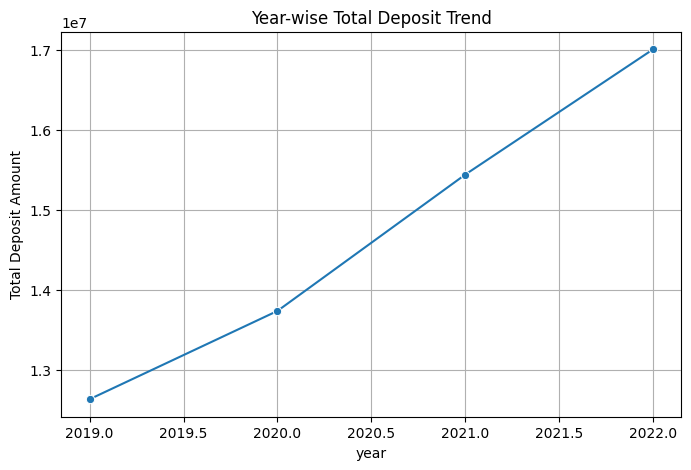

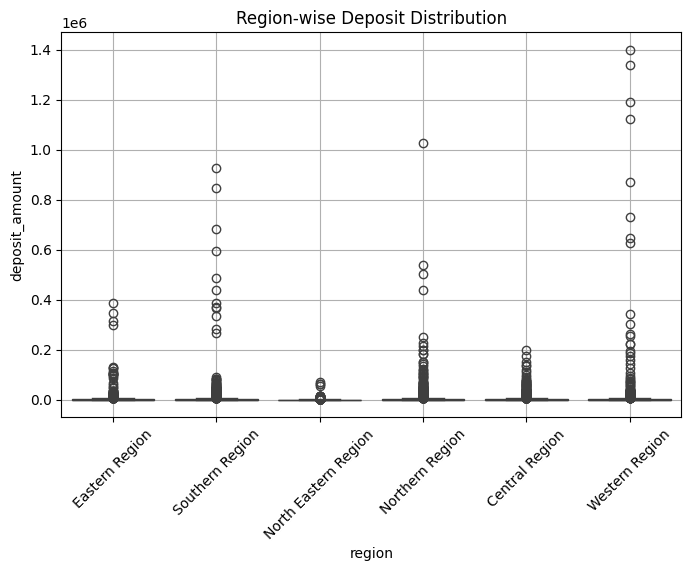

C:\Users\rugwe\AppData\Local\Temp\ipykernel_24828\1784513207.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='population_group', y='deposit_amount', estimator='mean', ci=None)


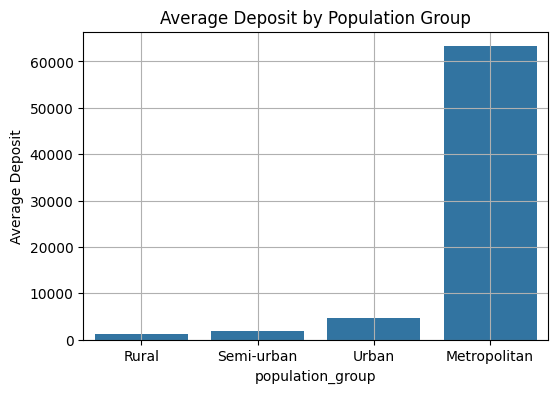

In [35]:
# Region-wise, Year-wise, Population Group Analysis

# Year-wise deposit trend
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='year', y='deposit_amount', estimator='sum', ci=None, marker='o')
plt.title("Year-wise Total Deposit Trend")
plt.ylabel("Total Deposit Amount")
plt.grid(True)
plt.show()

# Region-wise deposits
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='region', y='deposit_amount')
plt.title("Region-wise Deposit Distribution")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Population group-wise comparison
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='population_group', y='deposit_amount', estimator='mean', ci=None)
plt.title("Average Deposit by Population Group")
plt.ylabel("Average Deposit")
plt.grid(True)
plt.show()

In [42]:
# Year-wise Trend:
# Deposit amounts steadily increased from 2019 to 2022.
# Likely reasons: digital banking adoption, economic recovery post-COVID, financial inclusion schemes.

# 🗺️ Region-wise Distribution:
# Large variations across regions.
# Western and Southern regions tend to have higher deposit medians (possible due to states like Maharashtra, Karnataka, Gujarat).

# 🏘️ Population Group Analysis:
# Urban areas show significantly higher average deposits than rural or semi-urban.
# This validates the economic density of cities and reveals a digital and financial divide.

# ✅ Conclusion:
# There’s a consistent year-on-year growth in deposits, indicating a healthy financial trend.
# The disparity between rural and urban banking suggests a need for targeted financial inclusion in less-banked regions.

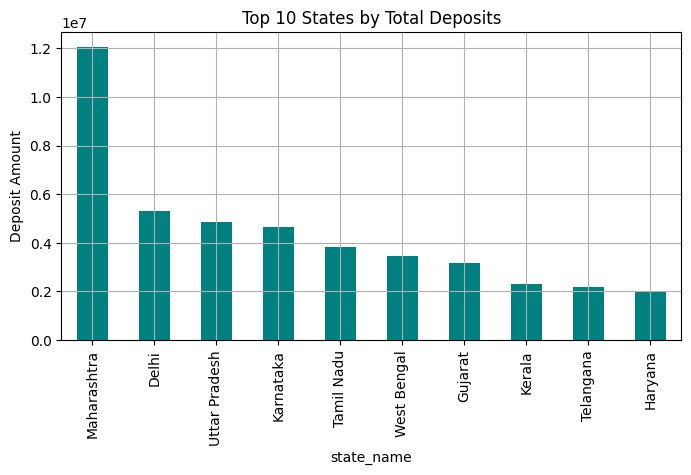

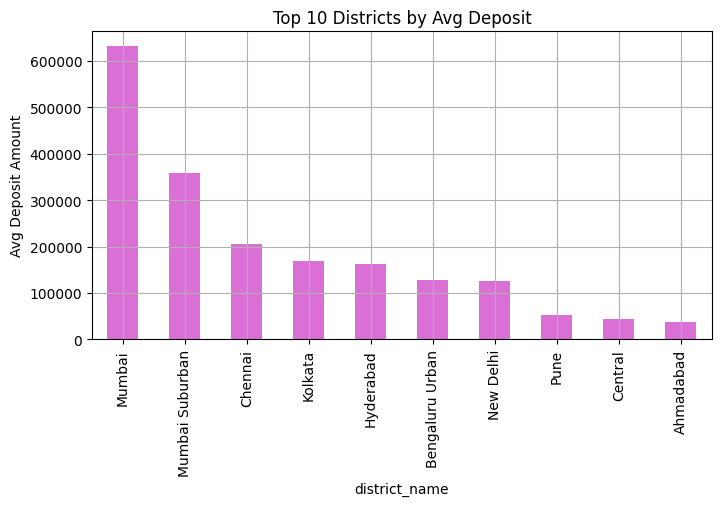

In [36]:
# Top States/Districts by Deposits

# Top 10 States by total deposits
top_states = df.groupby("state_name")["deposit_amount"].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', figsize=(8, 4), title="Top 10 States by Total Deposits", color='teal')
plt.ylabel("Deposit Amount")
plt.grid(True)
plt.show()

# Top 10 Districts by average deposits
top_districts = df.groupby("district_name")["deposit_amount"].mean().sort_values(ascending=False).head(10)
top_districts.plot(kind='bar', figsize=(8, 4), title="Top 10 Districts by Avg Deposit", color='orchid')
plt.ylabel("Avg Deposit Amount")
plt.grid(True)
plt.show()

In [43]:
# Top states by total deposits include Maharashtra, Tamil Nadu, Karnataka, and Gujarat—states with large urban centers and industries.
# Top districts (by average deposits) are likely metros like Mumbai, Bengaluru, Chennai, and Delhi zones.
# Urbanization, literacy, industrialization, and connectivity are common traits in these regions.

# ✅ Conclusion:
# The top contributors confirm expected economic centers.
# Useful for targeting investments, banking expansion, or risk analysis.

In [45]:
# 🧾 Final Summary:

# | Area                    | Key Takeaway                                                               |
# | ------------------------| -------------------------------------------------------------------------- |
# | Skewness & Outliers     | All features are heavily right-skewed and affected by high-value outliers. |
# | Log Transformations     | Helped normalize features and reduce skew.                                 |
# | Correlations            | Strong link between account count and deposit amount.                      |
# | Regional Patterns       | Southern and Western regions dominate.                                     |
# | Year-wise Trend         | Steady deposit growth over 4 years.                                        |
# | Population Group Impact | Urban areas dominate deposits; rural areas need support.                   |

Simple Linear Regression
Coefficient: [17.17768473]
Intercept: -6011.12369387211
R^2 Score: 0.6575646949237182


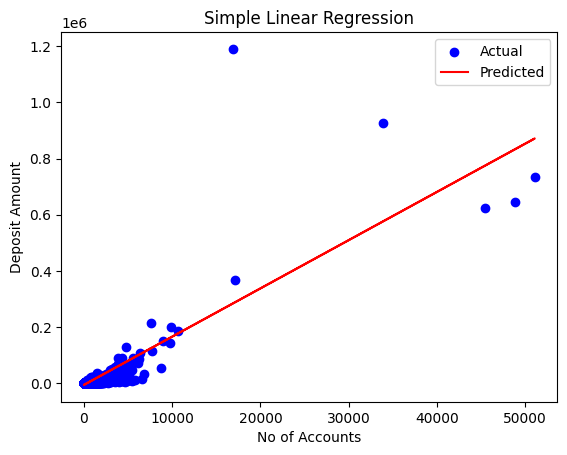


Sklearn Linear Regression
MSE: 495364977.96266526
R^2 Score: 0.6575646949237182


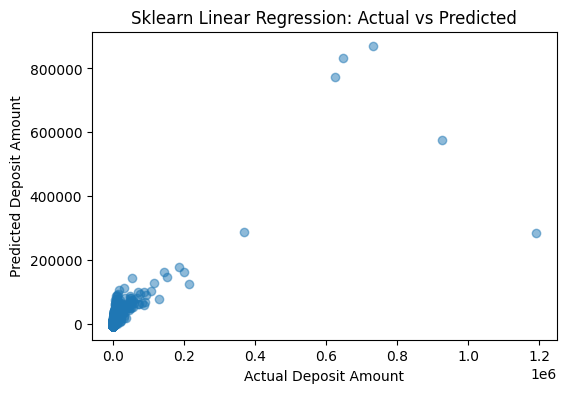

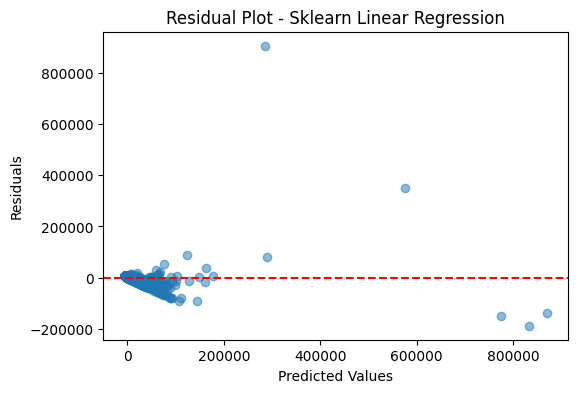


Multiple Linear Regression
Coefficients: [ 57.39007651  13.21723425 119.40225425]
Intercept: -247396.9494115059
MSE: 466231743.0055032
R^2 Score: 0.6777038824808301


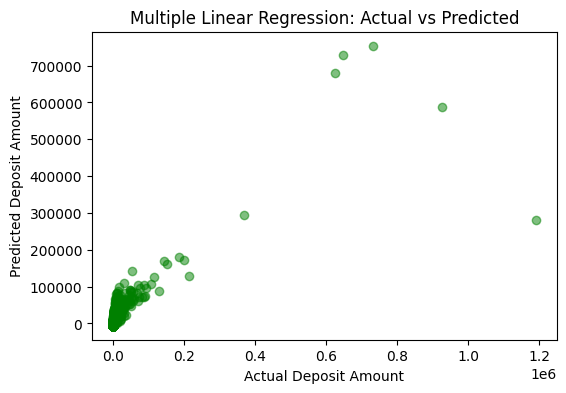

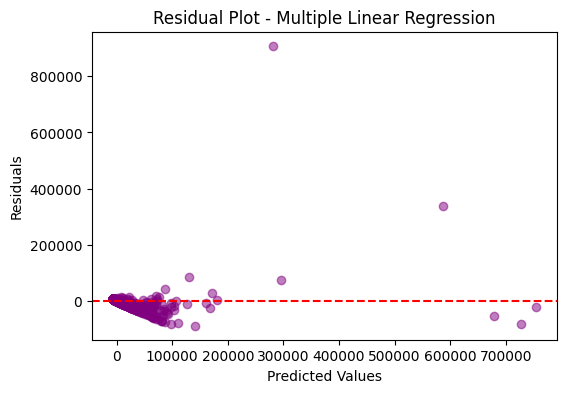

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = r"C:\Users\rugwe\Downloads\cleaned_populationgroup_deposits.csv"
df = pd.read_csv(file_path)

# ----------------------------
# 1. Simple Linear Regression (deposit ~ no_of_accounts)
# ----------------------------
X = df[['no_of_accounts']]
y = df['deposit_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Predictions
y_pred_simple = model_simple.predict(X_test)

print("Simple Linear Regression")
print("Coefficient:", model_simple.coef_)
print("Intercept:", model_simple.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred_simple))

# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_simple, color='red', label='Predicted')
plt.xlabel('No of Accounts')
plt.ylabel('Deposit Amount')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# ----------------------------
# 2. Linear Regression (with sklearn, same as above but kept separate)
# ----------------------------
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

print("\nSklearn Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R^2 Score:", r2_score(y_test, y_pred_linear))

# Visualization for Sklearn Linear Regression (Residual Plot)
# ----------------------------
X = df[['no_of_accounts']]
y = df['deposit_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)


plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel("Actual Deposit Amount")
plt.ylabel("Predicted Deposit Amount")
plt.title("Sklearn Linear Regression: Actual vs Predicted")
plt.show()


# Residual plot
residuals = y_test - y_pred_linear
plt.figure(figsize=(6,4))
plt.scatter(y_pred_linear, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Sklearn Linear Regression")
plt.show()

# ----------------------------
# 3. Multiple Linear Regression (deposit ~ no_of_offices + no_of_accounts + year)
# ----------------------------
features = ['no_of_offices', 'no_of_accounts', 'year']
X_multi = df[features]
y_multi = df['deposit_amount']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

# Predictions
y_pred_multi = model_multi.predict(X_test_m)

print("\nMultiple Linear Regression")
print("Coefficients:", model_multi.coef_)
print("Intercept:", model_multi.intercept_)
print("MSE:", mean_squared_error(y_test_m, y_pred_multi))
print("R^2 Score:", r2_score(y_test_m, y_pred_multi))

# Visualization for Multiple Linear Regression
# ----------------------------
features = ['no_of_offices', 'no_of_accounts', 'year']
X_multi = df[features]
y_multi = df['deposit_amount']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_multi = model_multi.predict(X_test_m)


# Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test_m, y_pred_multi, alpha=0.5, color='green')
plt.xlabel("Actual Deposit Amount")
plt.ylabel("Predicted Deposit Amount")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()


# Residual plot
residuals_multi = y_test_m - y_pred_multi
plt.figure(figsize=(6,4))
plt.scatter(y_pred_multi, residuals_multi, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Multiple Linear Regression")
plt.show()